In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# 311 Calls

loading dataset:

In [2]:
dataset = pd.read_csv('https://data.wprdc.org/datastore/dump/76fda9d0-69be-4dd5-8108-0de7907fc5a4', index_col = "REQUEST_ID")
dataset

,CREATED_ON,REQUEST_TYPE,REQUEST_ORIGIN,STATUS,DEPARTMENT,NEIGHBORHOOD,COUNCIL_DISTRICT,WARD,TRACT,PUBLIC_WORKS_DIVISION,PLI_DIVISION,POLICE_ZONE,FIRE_ZONE,X,Y,GEO_ACCURACY
REQUEST_ID,,,,,,,,,,,,,,,,
203364.0,2017-12-15T14:53:00,Street Obstruction/Closure,Call Center,1,DOMI - Permits,Central Northside,1.0,22.0,4.200322e+10,1.0,22.0,1.0,1-7,-80.016716,40.454144,EXACT
200800.0,2017-11-29T09:54:00,Graffiti,Control Panel,1,Police - Zones 1-6,South Side Flats,3.0,16.0,4.200316e+10,3.0,16.0,3.0,4-24,-79.969952,40.429243,APPROXIMATE
201310.0,2017-12-01T13:23:00,Litter,Call Center,1,DPW - Street Maintenance,Troy Hill,1.0,24.0,4.200324e+10,1.0,24.0,1.0,1-2,-79.985859,40.459716,EXACT
200171.0,2017-11-22T14:54:00,Water Main Break,Call Center,1,Pittsburgh Water and Sewer Authority,Banksville,2.0,20.0,4.200320e+10,5.0,20.0,6.0,4-9,-80.034210,40.406969,EXACT
193043.0,2017-10-12T12:46:00,Guide Rail,Call Center,1,DPW - Construction Division,East Hills,9.0,13.0,4.200313e+10,2.0,13.0,5.0,3-19,-79.876582,40.451226,EXACT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477528.0,2020-11-08T13:51:00,Illegal Parking,Report2Gov iOS,0,Police - Zones 1-6,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,-79.913513,40.471342,APPROXIMATE
477529.0,2020-11-08T14:53:00,Pruning (city tree),Report2Gov Android,0,DPW - Forestry Division,Westwood,2.0,28.0,4.200356e+10,5.0,28.0,6.0,1-18,-80.053100,40.436400,EXACT
477530.0,2020-11-08T16:06:00,Speeding,Website,0,Police - Zones 1-6,Duquesne Heights,2.0,19.0,4.200319e+10,5.0,19.0,3.0,4-1,-80.019932,40.438059,EXACT


overall count for which neighborhood has most 311 calls:

In [3]:
totalentries = len(dataset)

dataset['NEIGHBORHOOD'].value_counts().sort_values(ascending = False)

Brookline               18309
Carrick                 17352
Squirrel Hill South     15131
South Side Slopes       14724
South Side Flats        13792
                        ...  
East Carnegie             425
Northview Heights         420
Glen Hazel                290
Arlington Heights          87
Mount Oliver Borough       59
Name: NEIGHBORHOOD, Length: 91, dtype: int64

this is a lot of data, and not all of it may be relevant currently

in the data dictionary, a status of 0 means its a new entry

we can use a filter to only get entries with a status of 0, meaning it is new

In [4]:
filtered_dataset = dataset[dataset.STATUS == 0]
filtered_dataset

,CREATED_ON,REQUEST_TYPE,REQUEST_ORIGIN,STATUS,DEPARTMENT,NEIGHBORHOOD,COUNCIL_DISTRICT,WARD,TRACT,PUBLIC_WORKS_DIVISION,PLI_DIVISION,POLICE_ZONE,FIRE_ZONE,X,Y,GEO_ACCURACY
REQUEST_ID,,,,,,,,,,,,,,,,
179176.0,2017-08-14T14:00:00,Neighborhood Issues,Control Panel,0,NaN,Middle Hill,6.0,5.0,4.200305e+10,3.0,5.0,2.0,2-1,-79.977726,40.446142,APPROXIMATE
182748.0,2017-08-28T12:49:00,Abandoned Vehicle (parked on street),Control Panel,0,Police - AVU,Brighton Heights,1.0,27.0,4.200327e+10,1.0,27.0,1.0,1-14,-80.029944,40.486596,APPROXIMATE
184662.0,2017-09-05T13:49:00,Abandoned Vehicle (parked on street),Call Center,0,Police - AVU,Marshall-Shadeland,1.0,27.0,4.200327e+10,1.0,27.0,1.0,1-14,-80.027634,40.470334,APPROXIMATE
185902.0,2017-09-11T13:49:00,Parks Trails,Call Center,0,DPW - Park Maintenance,NaN,6.0,1.0,4.200302e+10,NaN,1.0,NaN,1-4,-80.005966,40.438043,EXACT
167825.0,2017-07-06T15:26:00,Illegal Dumping,Control Panel,0,DOMI - Permits,East Allegheny,1.0,23.0,4.200356e+10,1.0,23.0,1.0,1-20,-79.997763,40.452695,APPROXIMATE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477528.0,2020-11-08T13:51:00,Illegal Parking,Report2Gov iOS,0,Police - Zones 1-6,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,-79.913513,40.471342,APPROXIMATE
477529.0,2020-11-08T14:53:00,Pruning (city tree),Report2Gov Android,0,DPW - Forestry Division,Westwood,2.0,28.0,4.200356e+10,5.0,28.0,6.0,1-18,-80.053100,40.436400,EXACT
477530.0,2020-11-08T16:06:00,Speeding,Website,0,Police - Zones 1-6,Duquesne Heights,2.0,19.0,4.200319e+10,5.0,19.0,3.0,4-1,-80.019932,40.438059,EXACT


In [5]:
nbhcount = filtered_dataset['NEIGHBORHOOD'].value_counts().sort_values(ascending = False)
nbhcount

Brookline                    1201
Central Business District     970
Carrick                       826
Mount Washington              821
Beechview                     789
                             ... 
Ridgemont                      25
St. Clair                      23
Chartiers City                 20
Mount Oliver Borough           10
Arlington Heights               2
Name: NEIGHBORHOOD, Length: 91, dtype: int64

as a graph

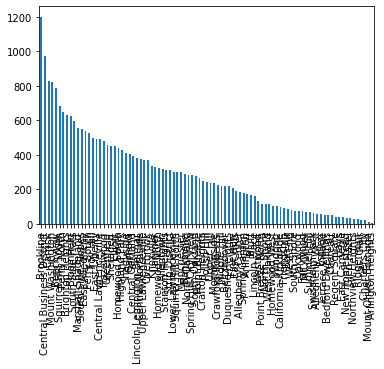

In [6]:
nbhcount.plot.bar()

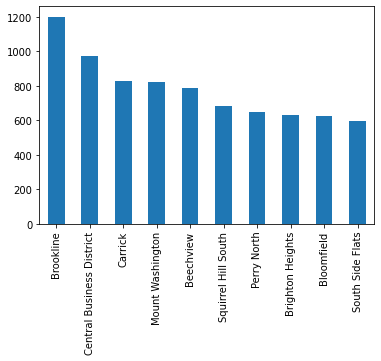

In [7]:
nbhcount.head(10).plot.bar()

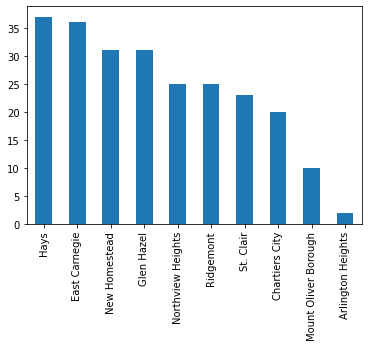

In [8]:
nbhcount.tail(10).plot.bar()

# Fires

In [9]:
fire = pd.read_csv("https://data.wprdc.org/datastore/dump/8d76ac6b-5ae8-4428-82a4-043130d17b02")

In [10]:
#Getting rid of rows without specified neighborhood
fire["neighborhood"].replace("", np.nan, inplace=True)
fire.dropna(subset=["neighborhood"], inplace=True)

In [11]:
#Creating a list of neighborhoods
neighborhoods = fire['neighborhood'].unique()
neighborhoods = sorted(neighborhoods)

In [12]:
#Algorithm for giving each neighborhood a score based on the severity of their fires
type_penalty = []
for neighborhood in neighborhoods:
    type_penalty.append(0)

count = 0
while count < fire['call_no'].count():
    neighborhood_penalty = 0
    if fire.iloc[count,1] == 131 or fire.iloc[count,1] == 150 or fire.iloc[count,1] == 151 or fire.iloc[count,1] == 118 or fire.iloc[count,1] == 142 or fire.iloc[count,1] == 160 or fire.iloc[count,1] == 130 or fire.iloc[count,1] == 112 or fire.iloc[count,1] == 138 or fire.iloc[count,1] == 162 or fire.iloc[count,1] == 100 or fire.iloc[count,1] == 154 or fire.iloc[count,1] == 143 or fire.iloc[count,1] == 140 or fire.iloc[count,1] == 117 or fire.iloc[count,1] == 132 or fire.iloc[count,1] == 133 or fire.iloc[count,1] == 120 or fire.iloc[count,1] == 134 or fire.iloc[count,1] == 155 or fire.iloc[count,1] == 173 or fire.iloc[count,1] == 171 or fire.iloc[count,1] == 164 or fire.iloc[count,1] == 170 or fire.iloc[count,1] == 122 or fire.iloc[count,1] == 137:
        neighborhood_penalty = 2
        
    if fire.iloc[count,1] == 111 or fire.iloc[count,1] == 152 or fire.iloc[count,1] == 136 or fire.iloc[count,1] == 161 or fire.iloc[count,1] == 153 or fire.iloc[count,1] == 141 or fire.iloc[count,1] == 123 or fire.iloc[count,1] == 163 or fire.iloc[count,1] == 121:
        neighborhood_penalty = 10

    neighborhood = fire.iloc[count,8]
    type_penalty[neighborhoods.index(neighborhood)] = type_penalty[neighborhoods.index(neighborhood)] + neighborhood_penalty
    count = count + 1
        

In [13]:
fire_alarms = fire.groupby("neighborhood").sum()
fire_alarms.head(10)

,incident_type,alarms,census_tract,council_district,ward,tract,public_works_division,pli_division,police_zone,latitude,longitude
neighborhood,,,,,,,,,,,
Allegheny Center,6429.0,24,107907.0,50.0,1100.0,2.100178e+12,50.0,1100.0,50.0,1982.192633,-3920.246192
Allegheny West,4606.0,10,73741.0,34.0,748.0,1.428121e+12,59.0,748.0,34.0,1334.878795,-2640.494942
Allentown,12322.0,75,179709.0,297.0,1782.0,4.158315e+12,416.0,1782.0,297.0,3920.944019,-7759.406504
Arlington,5257.0,23,64160.0,120.0,640.0,1.680142e+12,155.0,640.0,120.0,1616.651186,-3198.912662
Arlington Heights,1443.0,9,19252.0,36.0,192.0,5.040427e+11,43.0,192.0,36.0,485.010786,-959.569919
Banksville,6405.0,23,100489.0,100.0,1000.0,2.100160e+12,250.0,1000.0,300.0,1980.158414,-3921.918881
Bedford Dwellings,4284.0,29,17807.0,210.0,175.0,1.470107e+12,105.0,175.0,70.0,1415.753793,-2799.121896
Beechview,14635.0,59,220390.0,446.0,2194.0,4.830367e+12,575.0,2194.0,690.0,4525.984193,-8962.738202
Beltzhoover,13325.0,74,196471.0,329.0,1927.0,4.494381e+12,447.0,1927.0,321.0,4324.744016,-8560.290354


In [14]:
#Creating list of how many alarms each neighboorhood had
alarm_list = []
row_count = 0
while row_count < fire_alarms['alarms'].count():
    new_alarm = fire_alarms.iloc[row_count,1]
    alarm_list.append(new_alarm)
    row_count = row_count + 1

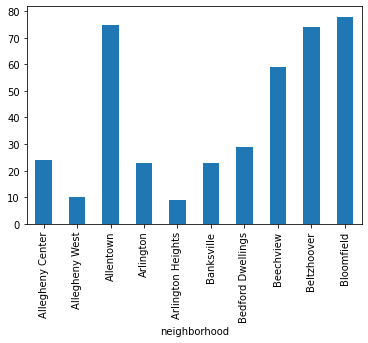

In [15]:
fire_alarms["alarms"].head(10).plot.bar()

In [16]:
fires_amt = []

In [17]:
#Creating list for how many fires each neighborhood had
for hood in neighborhoods:
    count = (fire['neighborhood'] == hood).sum()
    fires_amt.append(count)

In [18]:
fire_data = pd.DataFrame({'Neighborhoods': neighborhoods, 'Alarms': alarm_list, 'Fires': fires_amt, 'Severity Index': type_penalty})

### Scatter Plot of fires compared to alarms set off

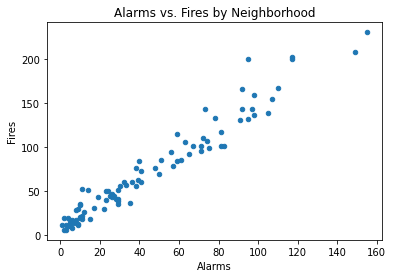

In [32]:
fire_data.plot(kind='scatter', x='Alarms', y='Fires', title="Alarms vs. Fires by Neighborhood")

### Neighborhoods ranked *only* by fires

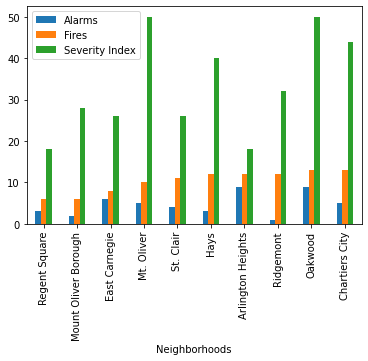

In [23]:
fire_data_plot = fire_data.sort_values(by=['Fires'])
fire_data_plot.head(10).plot.bar(x="Neighborhoods, ")

In [24]:
#Produces a final score for each neighborhood based on the 3 different metrics
row_count = 0
final_scores = []
while row_count < fire_data["Neighborhoods"].count():
    score = fire_data.iloc[row_count, 2] + (fire_data.iloc[row_count,1]/fire_data.iloc[row_count,2]) + fire_data.iloc[row_count,3]/10
    final_scores.append(score)
    row_count = row_count + 1

In [25]:
score_data = pd.DataFrame({"Neighborhoods": neighborhoods, "Scores": final_scores})
final_data = pd.merge(fire_data, score_data)
final_data = final_data.sort_values(by=['Scores'])
final_data = final_data.reset_index()
final_data = final_data.drop(['index'], axis=1)
final_data

,Neighborhoods,Alarms,Fires,Severity Index,Scores
0,Regent Square,3,6,18,8.300000
1,Mount Oliver Borough,2,6,28,9.133333
2,East Carnegie,6,8,26,11.350000
3,St. Clair,4,11,26,13.963636
4,Arlington Heights,9,12,18,14.550000
...,...,...,...,...,...
86,Squirrel Hill South,117,200,512,251.785000
87,South Side Flats,117,203,510,254.576355
88,Central Business District,149,208,474,256.116346
89,Hazelwood,95,200,570,257.475000


# Neighborhood Arrests

In [26]:
police = pd.read_csv("https://data.wprdc.org/datastore/dump/e03a89dd-134a-4ee8-a2bd-62c40aeebc6f", index_col=("INCIDENTNEIGHBORHOOD"))

In [27]:
neighborhoodarrests = police.groupby(["INCIDENTNEIGHBORHOOD"]).size().reset_index(name="counts")
neighborhoodarrests.head(10)

,INCIDENTNEIGHBORHOOD,counts
0,Allegheny Center,828
1,Allegheny West,85
2,Allentown,659
3,Arlington,198
4,Arlington Heights,109
5,Banksville,184
6,Bedford Dwellings,436
7,Beechview,843
8,Beltzhoover,369
9,Bloomfield,678


In [28]:
minarrests = neighborhoodarrests["counts"].min()
print(minarrests)
neighborhoodarrests.loc[neighborhoodarrests["counts"] == minarrests].iloc[0]

2


INCIDENTNEIGHBORHOOD    Mt. Oliver Neighborhood
counts                                        2
Name: 57, dtype: object

In [29]:
neighborhoodarrests.sort_values(["counts", "INCIDENTNEIGHBORHOOD"], ascending=True).head(20)
neighborhoodarrests.iloc[54,0] = "Mt. Oliver"
neighborhoodarrests.iloc[56,0] = "Mount Oliver Borough"

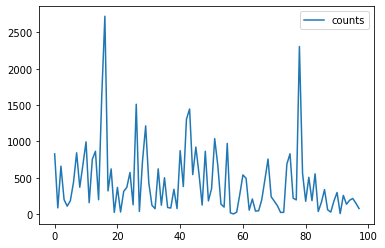

In [30]:
neighborhoodarrests.plot()

# The Grand Finale

In [31]:
final_ranking = []
for neighborhood in neighborhoods:
    #neighbborhoodarrests
    fdc = 0
    while fdc < neighborhoodarrests["INCIDENTNEIGHBORHOOD"].count():
        if neighborhoodarrests.iloc[fdc,0] == neighborhood:
            arrest_cnt = neighborhoodarrests.iloc[fdc,1]
        fdc = fdc + 1
    #final_data
    fdc = 0
    while fdc < final_data["Neighborhoods"].count():
        if final_data.iloc[fdc,0] == neighborhood:
            fire_final = final_data.iloc[fdc,4]
        fdc = fdc + 1
    #nbhcount
    fdc = 0
    nbh_final = nbhcount.loc[neighborhood]
    avg_score = arrest_cnt/10 + fire_final + nbh_final/100
    final_ranking.append(avg_score)
ranking = pd.DataFrame({"Neighborhood": neighborhoods, "Score": final_ranking})
ranking = ranking.sort_values(by=['Score'])
ranking = ranking.reset_index()
ranking = ranking.drop(['index'], axis=1)
ranking

,Neighborhood,Score
0,Mount Oliver Borough,10.833333
1,Regent Square,10.910000
2,East Carnegie,15.310000
3,St. Clair,17.693636
4,Ridgemont,17.933333
...,...,...
86,Hazelwood,349.595000
87,Homewood North,357.330323
88,South Side Flats,491.146355
89,Carrick,493.830996


According to the metrics we used, the best neighborhood in Pittsburgh is Mount Oliver Borough.
This neighborhood had very few fires along with almost no alarms set off. It also had the least amount of 311 calls and relatively few arrests.
It did well in all 3 of our datasets meaning it is definitively the best neighborhood.

## Casey's Conclusion:
I think that we did a good job with our datasets.
Our results do tend to favor smaller and less active neighborhoods, but if a person is basing their choice on these metrics, that may be for the best.
I'm glad that I went into detail with several different factors in my fire incidents dataset. I feel that those extra factors made our final result more accurate.
Overall, I think Mount Oliver Borough is not a bad result and I think that the final data is a good representation of what we were aiming for.

Sara's Conclusion:
In the end, Mt. Oliver neighborhood was the best neighborhood in Pittsburgh based on the amount of incidents that occurred in the area. In my analysis, I focused on police arrest data. Mt. Oliver was the highest ranked with only 2 arrests. It also ranked well in our other two metrics, 311 calls and fire incidents. It is important to note, I think, that population wasn't taken into consideration because living in a smaller neighborhood may be advantageous and lead to less incidents.